### Random Forest

Random Forest란 분류 / 회귀 에 사용하는 지도 학습 알고리즘.
 - 분류는 무엇인가를 나누는 모델
 - 회귀는 특정 변수를 통해 / 다른 변수를 예측하는 모델입니다.

Forest 인 이유는 이것이 여러개의 의사결정 나무 (decision Tree) 를 조합한 모델입니다.

의사결정 나무는 여러개의 if-else 로 이루어진 나무 모형이라고 볼 수 있습니다.


이 때 의사결정 나무는 탐욕재귀분할 알고리즘을 사용합니다.
탐욕 알고리즘의 특성 상, 한번 수행 할 때, 최적의 값을 고르지만
그 전체를 모았을 때 전체가 꼭 최적이 되라는 법은 없습니다.


### Random Forest 의 장점
 - 사람이 이해하기 굉장히 쉬움. (왜 그런 결과가 나왔는지 이해가 쉽다.)
 - 수치 / 범주 형 데이터 둘 다 처리하기 쉬움


### Random Forest 단점
 - 트리가 깊어지면 쉽게 오버피팅 됩니다.
   - 오버피팅이란, 학습 데이터를 너무 다 외워서, 현실과 오히려 거리가 멀어지는 현상 이라고 보면 좋습니다.
 - 데이터가 들어오는 순서가 바뀌면, 탐욕 알고리즘의 특성 상 트리 모양이 바뀝니다.
   - 즉 학습에 운의 요소가 많이 들어갑니다.
   - 거의 동일하게 학습해도 재현이 안 될 가능성이 높습니다.

### 단점 해결 방안
 - 학습 데이터를 중복 허용으로 랜덤하게 샘플링
 - 트리마다 다른 데이터 조합으로 학습해서 각각에게 물어 평균
 - 각 트리들이 전체 feature 를 보는게 아니라 일부 feature 만 랜덤하게 선택해서 분할 기준을 가져 감.


### Random Forest의 아이디어
 - 약간씩 다른 결정트리를 여러개 만들어서
 - 그 결과를 평균하자
   - 이러한 여러 모델을 만들어서, 여러 모델에게 의견을 묻는 방식을 Ensenble (앙상블) 기법이라고 합니다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

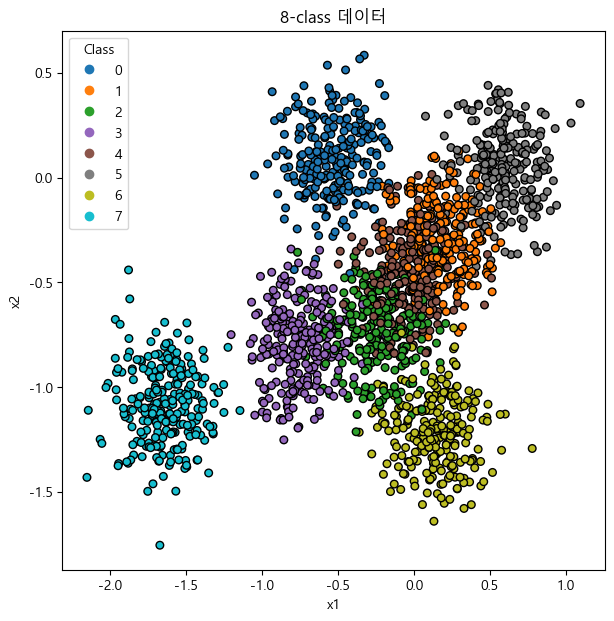

In [67]:
X, y = make_blobs(
    n_samples=2000,
    centers=8,
    n_features=2,
    cluster_std=0.175,
    center_box=(-1.75, 1.5),
    random_state=64
)

plt.figure(figsize=(7,7))
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap='tab10', edgecolor='k', s=30)
plt.title("8-class 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [69]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 7))
    plt.contourf(xx, yy, Z, alpha=0.35, cmap='tab10')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='tab10', s=25)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


결정트리 테스트 정확도: 0.8116666666666666


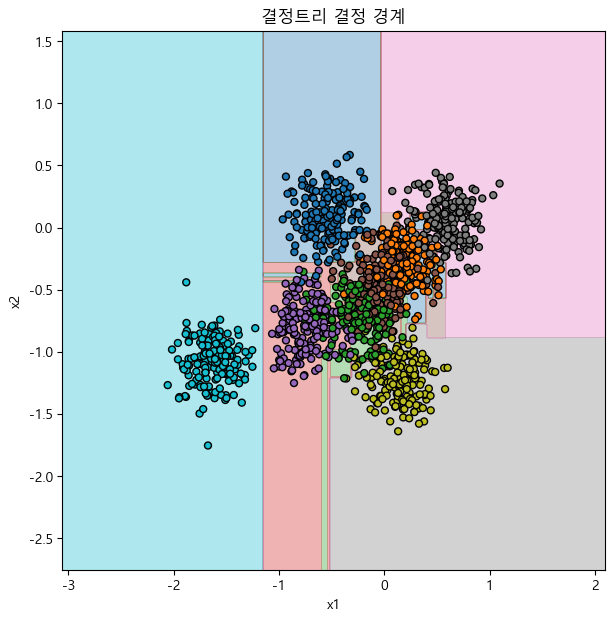

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("결정트리 테스트 정확도:", acc_tree)

plot_decision_boundary(tree, X_train, y_train, "결정트리 결정 경계")


랜덤포레스트 테스트 정확도: 0.8483333333333334


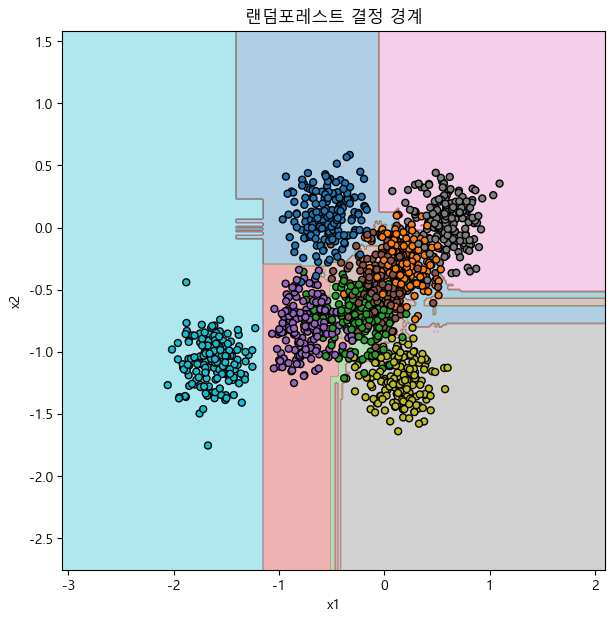

In [71]:
rf = RandomForestClassifier(
    n_estimators=150,   # 트리 개수
    max_depth=10,
    max_features="sqrt", 
    bootstrap=True,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("랜덤포레스트 테스트 정확도:", acc_rf)

plot_decision_boundary(rf, X_train, y_train, "랜덤포레스트 결정 경계")


각각의 결정트리는 조건문을 여러번 써서 데이터를 잘라가는 분류 모델 입니다.

이러한 결정트리를 여러개 모아둔 것이 Random Forest 인데요

모든 데이터를 한 덩어리로 놓고

어떻게 나누었을 때 클래스가 잘 구분될까를 기준으로, 나누기 좋은 기준을 찾습니다.


이렇게 트리를 만들면서, 한 클래스만 남거나, max_depth 에 도달하거나, 남은 데이터가 너무 적거나 하면 더 이상 만들지 않습니다.


랜덤 포레스트는 이러한 트리를 여러개 모아서, 그 들 전체에 의견을 묻는 과정이라고 보시면 됩니다.